## Logit models with policies sold as dependent variable
Overall, the model for policies sold has 93.1% predictive accuracy out-of-sample while the model for clicks has 82.2% out-of-sample accuracy. However, adding interaction terms doesn't seem to improve the performance.  

## Load libraries

In [40]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer


## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## Data preprocessing

In [41]:
df = pd.read_csv('../0-data/Root_Insurance_data.csv')

pd.get_dummies(df['click'])
df['click_true'] = pd.get_dummies(df['click'])[True]

# Unlike the classification tree example, I am not generating dummies

df.head()

from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df,
                                                 test_size = .25,
                                                 random_state = 614,
                                                 shuffle = True)


X_train= df_train[['Currently Insured','Number of Vehicles','Number of Drivers', 'Marital Status', 'bid', 'rank']].copy()
y_train= df_train[['policies_sold']].copy()
y_train=y_train.squeeze()

X_test= df_test[['Currently Insured','Number of Vehicles','Number of Drivers', 'Marital Status', 'bid', 'rank']].copy()
y_test= df_test[['policies_sold']].copy()

X_train[["Currently Insured", "rank"]].value_counts(sort = True).sort_index()

Currently Insured  rank
N                  1        90
                   2       291
                   3       674
                   4       727
                   5       807
Y                  1       133
                   2       215
                   3       597
                   4       712
                   5       917
unknown            1       983
                   2       705
                   3       520
                   4       129
dtype: int64

## First we consider the simplest model

At first, we build a logit model with simple features: 'Currently Insured','Number of Vehicles','Number of Drivers', 'Marital Status', 'bid', 'rank'. We consider rank as continous and others as categorical.

Optimization terminated successfully.
         Current function value: 0.240028
         Iterations 8


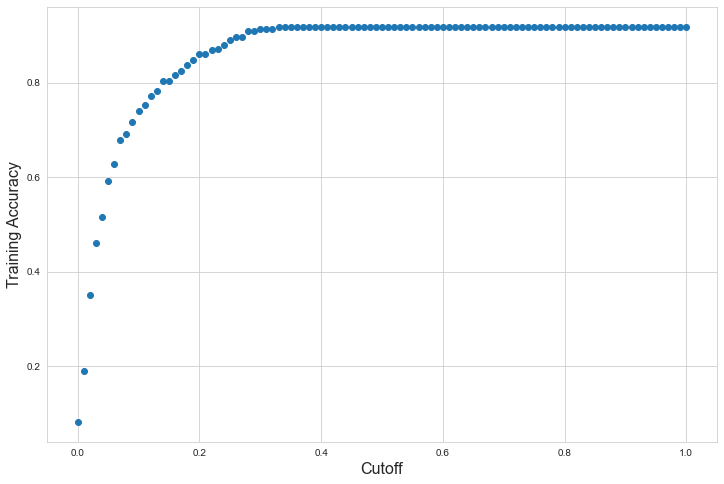

In [47]:
# statsmodels formula version allows writing the model in terms of equation 
# Model 1: No frills model with all the explanatory variables, no interaction
policies_model_1=smf.logit(formula='policies_sold~ C(Q("Marital Status"))+ C(Q("Number of Vehicles"))+C(Q("Number of Drivers"))+C(Q("Currently Insured"))+rank', data=df_train)
policies_model_1=policies_model_1.fit()

## Write code to calculate the accuracy for any cutoff, then choose your cutoff

## store the predicted probabilities
y_prob = policies_model_1.predict(X_train)

cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob > cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

plt.figure(figsize=(12,8))

plt.scatter(cutoffs,accs)

plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)

plt.show()



We will use a cut off 0.4

## Out of sample performance

In [43]:
# performing predictions on the test datdaset
cutoff=0.4
y_prob = policies_model_1.predict(X_test)
y_pred= 1*(y_prob > cutoff)

from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)  
# confusion matrix
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[2327    0]
 [ 173    0]]
Test accuracy =  0.9308


We got an out of sample accuracy of 93.08% which is very good. We are worried whether we should consider rank as categorical variable. We repeat the model with rank as categorical variable next.

## Using rank as categorical variable

Same model, only rank is categorical here

Optimization terminated successfully.
         Current function value: 0.239834
         Iterations 9


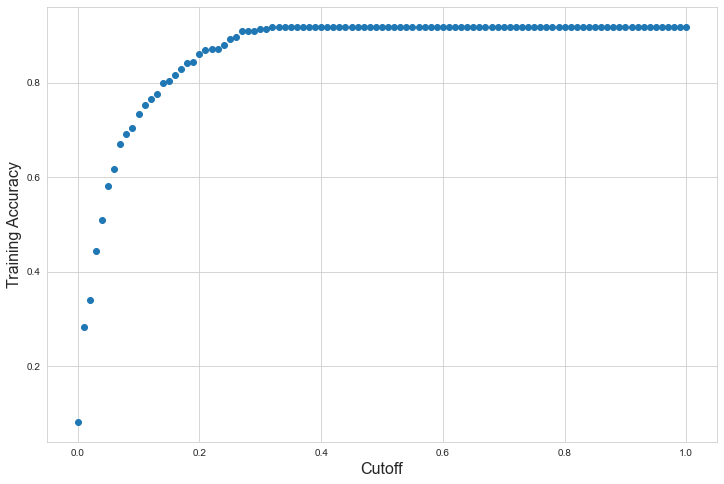

Confusion Matrix : 
 [[2327    0]
 [ 173    0]]
Test accuracy =  0.9308


In [44]:
# statsmodels formula version allows writing the model in terms of equation 
# Model 1: No frills model with all the explanatory variables, no interaction
policies_model_2=smf.logit(formula='policies_sold~ C(Q("Marital Status"))+ C(Q("Number of Vehicles"))+C(Q("Number of Drivers"))+C(Q("Currently Insured"))+C(rank)', data=df_train)
policies_model_2=policies_model_2.fit()

## Write code to calculate the accuracy for any cutoff, then choose your cutoff

## store the predicted probabilities
y_prob = policies_model_2.predict(X_train)

cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob > cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

plt.figure(figsize=(12,8))
plt.scatter(cutoffs,accs)
plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)
plt.show()

## Chosen cut off 0.4 again

# performing predictions on the test datdaset
cutoff=0.4
y_prob = policies_model_2.predict(X_test)
y_pred= 1*(y_prob > cutoff)

from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)  
# confusion matrix
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, y_pred))

## Adding interaction betweens features
Since there is no difference in accurancy, we will keep using rank as continuous. Next we will try out several models where we add interaction terms to the model, and see if the accuracy improves

 + Model 1: No frills model with all the explanatory variables (The first model earlier)
 + Model 2: Interacting marital status with rank
 + Model 3: Interacting number of vehicles with rank
 + Model 4: Interacting number of drivers with rank
 + Model 5: Interacting currently insured with rank
 + Model 6: Interacting rank with all other features
 

In [45]:
# Model 1: No frills model with all the explanatory variables
policies_model_1=smf.logit(formula='policies_sold~ C(Q("Marital Status"))+ C(Q("Number of Vehicles"))+C(Q("Number of Drivers"))+C(Q("Currently Insured"))+rank', data=df_train)
policies_model_1=policies_model_1.fit()

# Model 2: Interacting marital status with rank
policies_model_2=smf.logit(formula='policies_sold~ C(Q("Marital Status"))*rank+ C(Q("Number of Vehicles"))+C(Q("Number of Drivers"))+C(Q("Currently Insured"))', data=df_train)
policies_model_2=policies_model_2.fit()


# Model 3: Interacting number of vehicles with rank
policies_model_3=smf.logit(formula='policies_sold~ C(Q("Marital Status"))+ C(Q("Number of Vehicles"))*rank+C(Q("Number of Drivers"))+C(Q("Currently Insured"))', data=df_train)
policies_model_3=policies_model_3.fit()


# Model 4: Interacting number of drivers with rank
policies_model_4=smf.logit(formula='policies_sold~ C(Q("Marital Status"))+ C(Q("Number of Vehicles"))+C(Q("Number of Drivers"))*rank+C(Q("Currently Insured"))', data=df_train)
policies_model_4=policies_model_4.fit()


# Model 5: Interacting currently insured with rank
policies_model_5=smf.logit(formula='policies_sold~ C(Q("Marital Status"))+ C(Q("Number of Vehicles"))+C(Q("Number of Drivers"))+C(Q("Currently Insured"))*rank', data=df_train)
policies_model_5=policies_model_5.fit()

# Model 6: Interacting rank with all other features
policies_model_6=smf.logit(formula='policies_sold~ C(Q("Marital Status"))*rank+ C(Q("Number of Vehicles"))*rank+C(Q("Number of Drivers"))*rank+C(Q("Currently Insured"))*rank', data=df_train)
policies_model_6=policies_model_6.fit()

# Model 7: Interacting rank with all other features
policies_model_7=smf.logit(formula='policies_sold~ C(Q("Marital Status"))*C(rank) + C(Q("Number of Vehicles"))*C(rank) + C(Q("Number of Drivers"))*C(rank) +C(Q("Currently Insured"))', data=df_train)
policies_model_7=policies_model_7.fit()

# Model 8: Interacting rank with all other features
policies_model_8=smf.logit(formula='policies_sold~ C(Q("Marital Status"))*C(rank) + C(Q("Number of Vehicles"))*C(rank) + C(Q("Number of Drivers")) + C(Q("Currently Insured"))', data=df_train)
policies_model_8=policies_model_8.fit()

# Model 9: Interacting rank with all other features
policies_model_9=smf.logit(formula='policies_sold~  C(Q("Currently Insured"))*C(rank)', data=df_train)
policies_model_9=policies_model_9.fit()

Optimization terminated successfully.
         Current function value: 0.240028
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.239988
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.240011
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.239771
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.239912
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.239583
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.238621
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.239261
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.241559
         Iterations 9


LinAlgError: Singular matrix

## Accuracy of fit for model 2



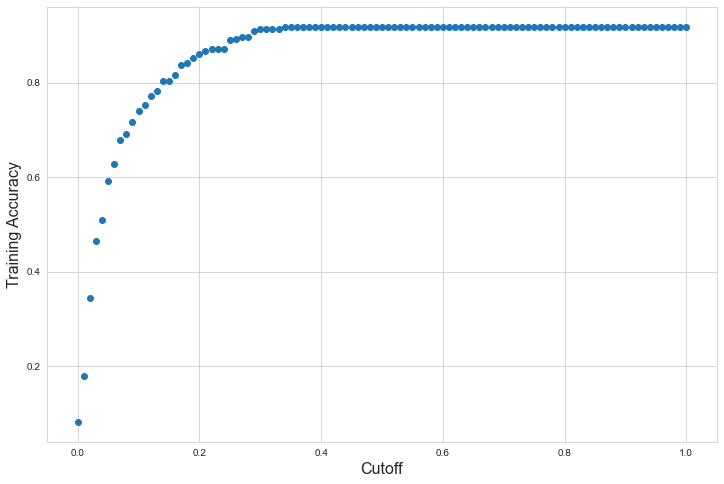

Confusion Matrix : 
 [[2327    0]
 [ 173    0]]
Test accuracy =  0.9308


In [10]:
## store the predicted probabilities
y_prob = policies_model_2.predict(X_train)

cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob > cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

plt.figure(figsize=(12,8))
plt.scatter(cutoffs,accs)
plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)
plt.show()

## Chosen cut off 0.4 again

# performing predictions on the test datdaset
cutoff=0.4
y_prob = policies_model_2.predict(X_test)
y_pred= 1*(y_prob > cutoff)

from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)  
# confusion matrix
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, y_pred))

## Model 3

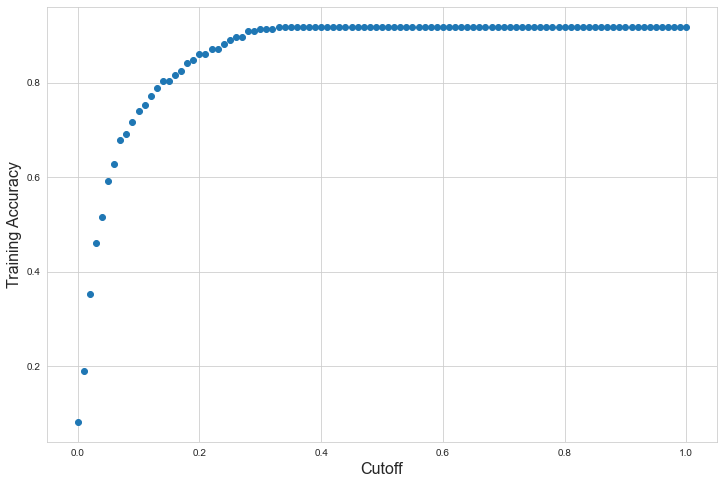

Confusion Matrix : 
 [[2327    0]
 [ 173    0]]
Test accuracy =  0.9308


In [11]:
## store the predicted probabilities
y_prob = policies_model_3.predict(X_train)

cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob > cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

plt.figure(figsize=(12,8))
plt.scatter(cutoffs,accs)
plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)
plt.show()

## Chosen cut off 0.4 again

# performing predictions on the test datdaset
cutoff=0.4
y_prob = policies_model_3.predict(X_test)
y_pred= 1*(y_prob > cutoff)

from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)  
# confusion matrix
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, y_pred))

## Model 4

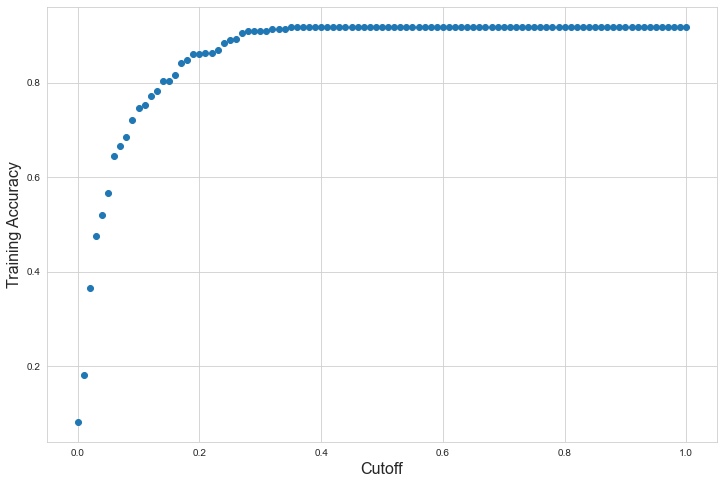

Confusion Matrix : 
 [[2327    0]
 [ 173    0]]
Test accuracy =  0.9308


In [12]:
## store the predicted probabilities
y_prob_4 = policies_model_4.predict(X_train)

cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob_4 > cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

plt.figure(figsize=(12,8))
plt.scatter(cutoffs,accs)
plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)
plt.show()

## Chosen cut off 0.4 again

# performing predictions on the test datdaset
cutoff=0.4
y_prob_4 = policies_model_4.predict(X_test)
y_pred_4= 1*(y_prob_4 > cutoff)

from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)  
# confusion matrix
cm = confusion_matrix(y_test, y_pred_4) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, y_pred))

## Model 5

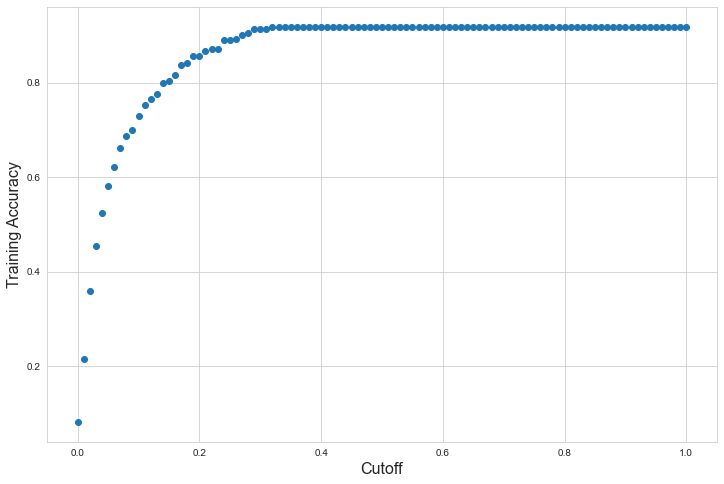

Confusion Matrix : 
 [[2327    0]
 [ 173    0]]
Test accuracy =  0.9308


In [13]:
## store the predicted probabilities
y_prob = policies_model_5.predict(X_train)

cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob > cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

plt.figure(figsize=(12,8))
plt.scatter(cutoffs,accs)
plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)
plt.show()

## Chosen cut off 0.4 again

# performing predictions on the test datdaset
cutoff=0.4
y_prob = policies_model_5.predict(X_test)
y_pred= 1*(y_prob > cutoff)

from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)  
# confusion matrix
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, y_pred))

## Model 6

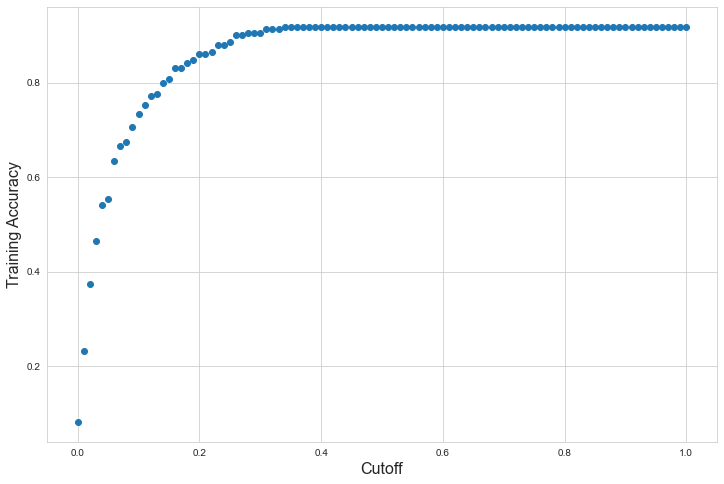

Confusion Matrix : 
 [[2327    0]
 [ 173    0]]
Test accuracy =  0.9308


In [14]:
## store the predicted probabilities
y_prob = policies_model_6.predict(X_train)

cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob > cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

plt.figure(figsize=(12,8))
plt.scatter(cutoffs,accs)
plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)
plt.show()

## Chosen cut off 0.4 again

# performing predictions on the test datdaset
cutoff=0.4
y_prob = policies_model_6.predict(X_test)
y_pred= 1*(y_prob > cutoff)

from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)  
# confusion matrix
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, y_pred))

## Summary results
Adding interaction variables doesn't seem to increase predictive power. However, interactions may be useful for explanatory analysis. We report the coefficients of all the models in a summary table.

In [135]:
Stargazer([policies_model_1, policies_model_2, policies_model_3, policies_model_4, policies_model_5, policies_model_6])

## Logit models for click


 + Model 1: No frills model with all the explanatory variables 
 + Model 2: Interacting marital status with rank
 + Model 3: Interacting number of vehicles with rank
 + Model 4: Interacting number of drivers with rank
 + Model 5: Interacting currently insured with rank
 + Model 6: Interacting rank with all other features

In [141]:
# statsmodels formula version allows writing the model in terms of equation 
# Model 1: No frills model with all the explanatory variables

X_train= df_train[['Currently Insured','Number of Vehicles','Number of Drivers', 'Marital Status', 'bid', 'rank']].copy()
y_train= df_train[['click_true']].copy()
y_train=y_train.squeeze()

X_test= df_test[['Currently Insured','Number of Vehicles','Number of Drivers', 'Marital Status', 'bid', 'rank']].copy()
y_test= df_test[['click_true']].copy()

click_model_1=smf.logit(formula='click_true~ C(Q("Marital Status"))+ C(Q("Number of Vehicles"))+C(Q("Number of Drivers"))+C(Q("Currently Insured"))+rank', data=df_train)
click_model_1=click_model_1.fit()


# Model 2: Interacting marital status with rank
click_model_2=smf.logit(formula='click_true~ C(Q("Marital Status"))*rank+ C(Q("Number of Vehicles"))+C(Q("Number of Drivers"))+C(Q("Currently Insured"))', data=df_train)
click_model_2=click_model_2.fit()

# Model 3: Interacting number of vehicles with rank
click_model_3=smf.logit(formula='click_true~ C(Q("Marital Status"))+ C(Q("Number of Vehicles"))*rank+C(Q("Number of Drivers"))+C(Q("Currently Insured"))', data=df_train)
click_model_3=click_model_3.fit()

# Model 4: Interacting number of drivers with rank
click_model_4=smf.logit(formula='click_true~ C(Q("Marital Status"))+ C(Q("Number of Vehicles"))+C(Q("Number of Drivers"))*rank+C(Q("Currently Insured"))', data=df_train)
click_model_4=click_model_4.fit()

# Model 5: Interacting currently insured with rank
click_model_5=smf.logit(formula='click_true~ C(Q("Marital Status"))+ C(Q("Number of Vehicles"))+C(Q("Number of Drivers"))+C(Q("Currently Insured"))*rank', data=df_train)
click_model_5=click_model_5.fit()

# Model 5: Interacting rank with all other features
click_model_6=smf.logit(formula='click_true~ C(Q("Marital Status"))*rank+ C(Q("Number of Vehicles"))*rank+C(Q("Number of Drivers"))*rank+C(Q("Currently Insured"))*rank', data=df_train)
click_model_6=click_model_6.fit()


#Stargazer([click_model_1.fit(), click_model_2.fit(), click_model_3.fit(), click_model_4.fit(), click_model_5.fit()])


Optimization terminated successfully.
         Current function value: 0.390195
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.390129
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.390094
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.390175
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.390189
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.390009
         Iterations 7


## Click Model 1

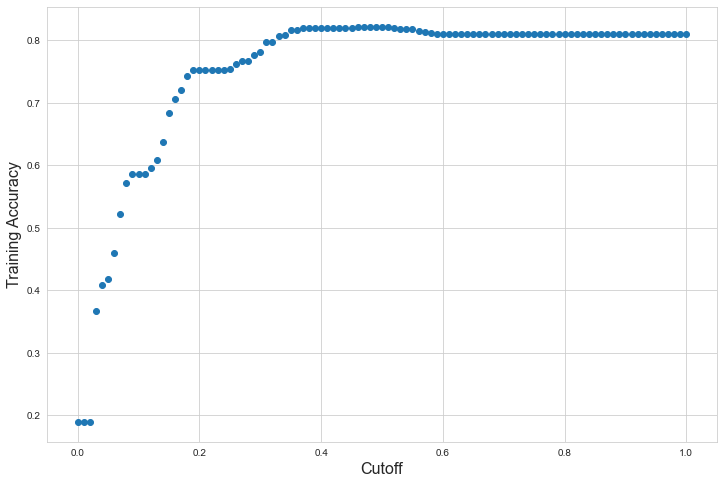

Confusion Matrix : 
 [[1847  195]
 [ 248  210]]
Test accuracy =  0.8228


In [142]:
## store the predicted probabilities
y_prob = click_model_1.predict(X_train)

cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob > cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

plt.figure(figsize=(12,8))
plt.scatter(cutoffs,accs)
plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)
plt.show()

## Chosen cut off 0.4 again

# performing predictions on the test datdaset
cutoff=0.4
y_prob = click_model_1.predict(X_test)
y_pred= 1*(y_prob > cutoff)

from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)  
# confusion matrix
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, y_pred))

## Click model 2

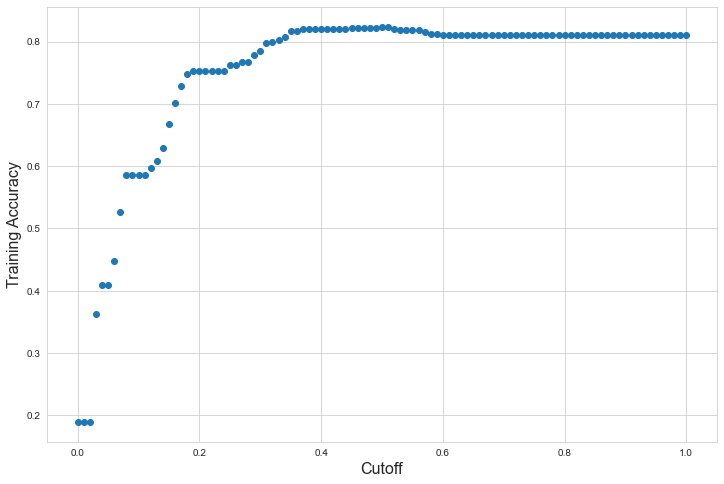

Confusion Matrix : 
 [[1847  195]
 [ 248  210]]
Test accuracy =  0.8228


In [143]:
## store the predicted probabilities
y_prob = click_model_2.predict(X_train)

cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob > cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

plt.figure(figsize=(12,8))
plt.scatter(cutoffs,accs)
plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)
plt.show()

## Chosen cut off 0.4 again

# performing predictions on the test datdaset
cutoff=0.4
y_prob = click_model_2.predict(X_test)
y_pred= 1*(y_prob > cutoff)

from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)  
# confusion matrix
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, y_pred))

## Click model 3

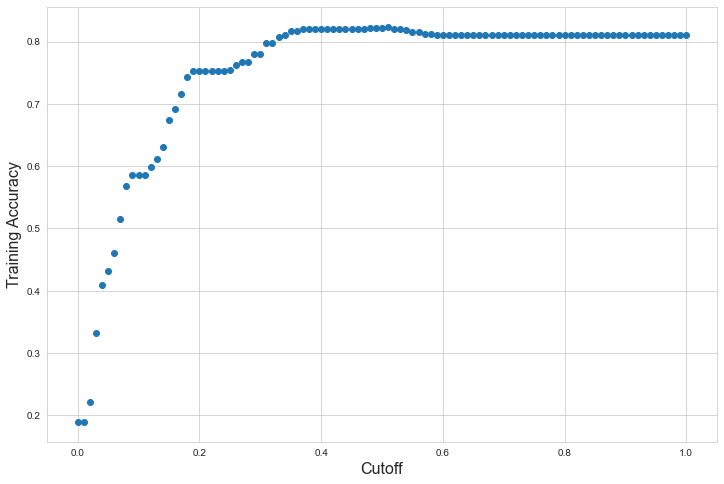

Confusion Matrix : 
 [[1847  195]
 [ 248  210]]
Test accuracy =  0.8228


In [144]:
## store the predicted probabilities
y_prob = click_model_3.predict(X_train)

cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob > cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

plt.figure(figsize=(12,8))
plt.scatter(cutoffs,accs)
plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)
plt.show()

## Chosen cut off 0.4 again

# performing predictions on the test datdaset
cutoff=0.4
y_prob = click_model_3.predict(X_test)
y_pred= 1*(y_prob > cutoff)

from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)  
# confusion matrix
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, y_pred))

## Click model 4 

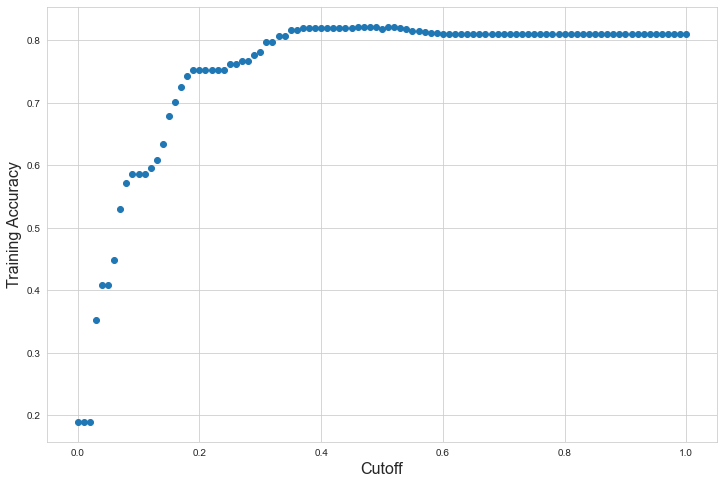

Confusion Matrix : 
 [[1847  195]
 [ 248  210]]
Test accuracy =  0.8228


In [145]:
## store the predicted probabilities
y_prob = click_model_4.predict(X_train)

cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob > cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

plt.figure(figsize=(12,8))
plt.scatter(cutoffs,accs)
plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)
plt.show()

## Chosen cut off 0.4 again

# performing predictions on the test datdaset
cutoff=0.4
y_prob = click_model_4.predict(X_test)
y_pred= 1*(y_prob > cutoff)

from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)  
# confusion matrix
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, y_pred))

## Click model 5

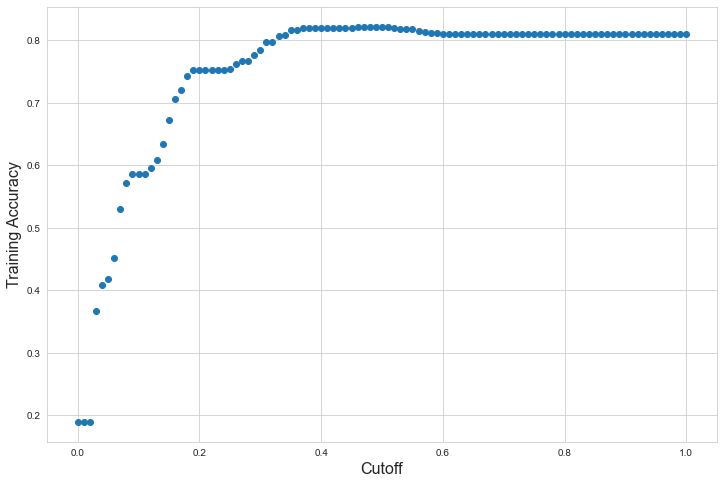

Confusion Matrix : 
 [[1847  195]
 [ 248  210]]
Test accuracy =  0.8228


In [146]:
## store the predicted probabilities
y_prob = click_model_5.predict(X_train)

cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob > cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

plt.figure(figsize=(12,8))
plt.scatter(cutoffs,accs)
plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)
plt.show()

## Chosen cut off 0.4 again

# performing predictions on the test datdaset
cutoff=0.4
y_prob = click_model_5.predict(X_test)
y_pred= 1*(y_prob > cutoff)

from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)  
# confusion matrix
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, y_pred))

## Click model 6

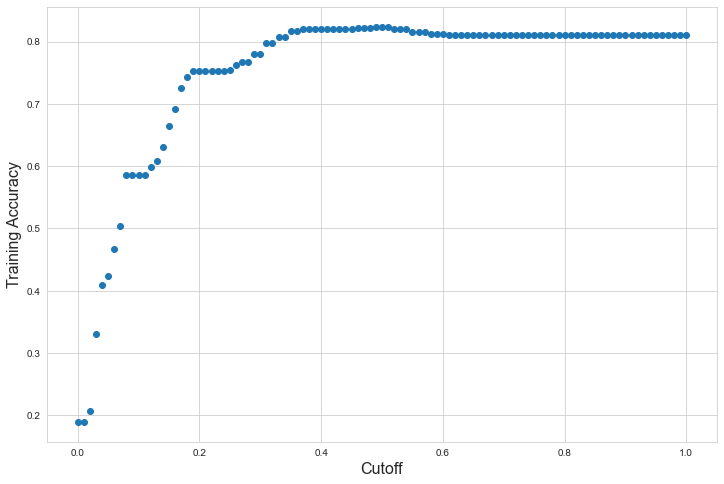

Confusion Matrix : 
 [[1847  195]
 [ 248  210]]
Test accuracy =  0.8228


In [147]:
## store the predicted probabilities
y_prob = click_model_6.predict(X_train)

cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob > cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

plt.figure(figsize=(12,8))
plt.scatter(cutoffs,accs)
plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)
plt.show()

## Chosen cut off 0.4 again

# performing predictions on the test datdaset
cutoff=0.4
y_prob = click_model_6.predict(X_test)
y_pred= 1*(y_prob > cutoff)

from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)  
# confusion matrix
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, y_pred))

## Summary table for clicks


In [148]:
Stargazer([click_model_1, click_model_2, click_model_3, click_model_4, click_model_5, click_model_6])